In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
from math import floor
import xgboost as xgb
import pickle
from shutil import copyfile
import matplotlib.pyplot as plt


In [3]:
import sys
import os
import tkinter as tk
from tkinter import filedialog

# Get path of common model code and add it to the python path variable
curr_dir = !echo %cd% 

init_common_dir = curr_dir[0]
common_model_dir = filedialog.askdirectory(initialdir = init_common_dir,
                                         title = "Choose current the Common_Model_Code directory...")

sys.path.insert(0, common_model_dir)
from class_feature_selection import perform_feat_sel_models
from class_model_creation import model_data, perform_grid_search, create_smote_data, create_under_data



In [4]:
import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None


User input variables

In [5]:
# Get files needed
train_data_file = filedialog.askopenfilename(initialdir = \
                                             'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\',
                                         title = "Choose training data file...")
train_target_file = filedialog.askopenfilename(title = "Choose training target file...")
test_data_file = filedialog.askopenfilename(title = "Choose testing data file...")
test_target_file = filedialog.askopenfilename(title = "Choose testing target file...")

init_save_path = 'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\'
base_path = filedialog.askdirectory(initialdir = init_save_path,
                                         title = "Choose base save directory...")
base_path = base_path.replace("/", "\\")
base_path += "\\"


Assign file path variables

In [6]:
model_base_name = 'Optimal_XGB_Model_Precision'


Assign date and time to variable

In [7]:
current_time = datetime.datetime.now()
start_time_str = current_time.strftime("%Y-%m-%d")

Assign model and data paths

In [8]:
model_path = base_path + 'Model\\'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model_res_path = model_path + start_time_str + '_' + model_base_name + '\\'

if not os.path.exists(model_res_path):
    os.mkdir(model_res_path)

Import Training Data

In [9]:
train_data = pd.read_csv(train_data_file, delimiter=",", index_col = 0, header = 0)
train_target = pd.read_csv(train_target_file, delimiter=",", index_col = 0, header = 0)

In [10]:
train_data.shape

(21923, 360)

In [11]:
train_target.shape

(21923, 1)

Import Testing Data

In [12]:
test_data = pd.read_csv(test_data_file, delimiter=",", index_col = 0, header = 0)
test_target = pd.read_csv(test_target_file, delimiter=",", index_col = 0, header = 0)

In [13]:
test_data.shape

(5481, 360)

In [14]:
test_target.shape

(5481, 1)

Check training and testing variables

In [15]:
num_rows = train_data.shape[0] + 1
num_cols = train_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

Assign variables needed for feature selection

In [16]:
score_thresh = 0.05
var_buffer_perc = 0.01
perc_vals = list(range(5, 105, 5))
thresh_vals = list(np.arange(0.1, 1.1, 0.1))
step_val = 0.1

num_features = train_data.shape[1]
num_feat_steps = 20
k_step_sz = num_features / num_feat_steps
k_max = num_features + k_step_sz
k_vals = list(np.arange(1, k_max, k_step_sz).astype('int'))

Assign variables needed for modeling

In [17]:
rand_st = 45
cv_num = 5
cv_scorers = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
metric_fcns = ['accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']
main_scorer = 'precision'


Create base model object (all parameters specified are default values)

In [18]:
base_model = xgb.XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 100, 
                               objective = 'binary:logistic', 
                               random_state = rand_st)

Assign variables needed for grid search

In [19]:
colsample_bytree  = [0.5, 0.75, 1]
n_estimators = [50, 100, 250]
max_depth = [3, 5, 7, 10]
learning_rate = [0.05, 0.1, 0.2]
gamma  = [0, 1, 0.5]
objective = ['binary:logistic']

grid_params = {
    'colsample_bytree': colsample_bytree,
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'gamma': gamma,
    'objective': objective
}

Create model object for grid search optimization

In [20]:
grid_model = xgb.XGBClassifier(random_state = rand_st)


Create base model with all features

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.8551748766115406 +/- 0.011327963653837609
CV  test_f1 : 0.9029888697514765 +/- 0.007012511699579332
CV  test_precision : 0.8564831993467052 +/- 0.01301148058701841
CV  test_recall : 0.9548888515266925 +/- 0.009350221850214868
CV  test_roc_auc : 0.8847837539968288 +/- 0.0071166144483316065
CV Runtime: 101.95827436447144


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




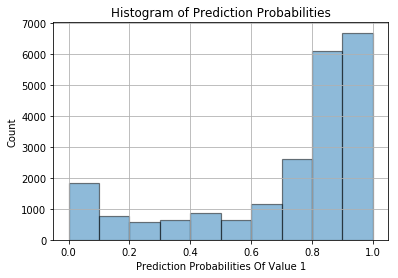

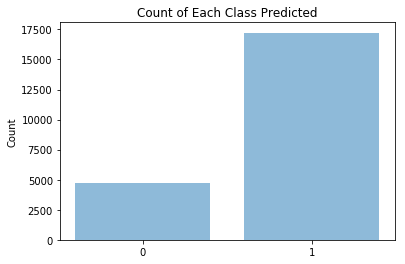

Number of 0 predictions: 4699
Number of 1 predictions: 17224
Percent of predictions with value 0: 0.21434110295123843
Percent of predictions with value 1: 0.7856588970487616


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


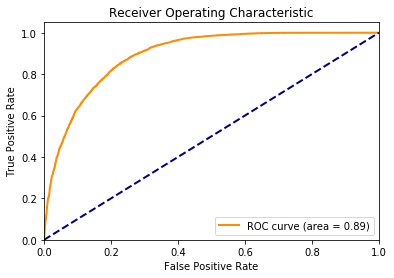



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8571819550244036
f1_score : 0.9042419793864881
precision_score : 0.8582791453785416
recall_score : 0.9554061914302333
roc_auc_score : 0.7884782895135664


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      6450
           1       0.86      0.96      0.90     15473

    accuracy                           0.86     21923
   macro avg       0.86      0.79      0.81     21923
weighted avg       0.86      0.86      0.85     21923



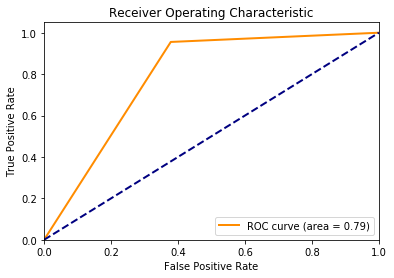

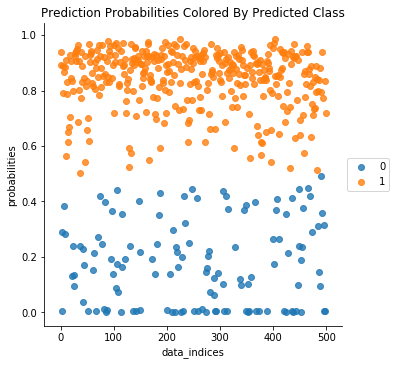

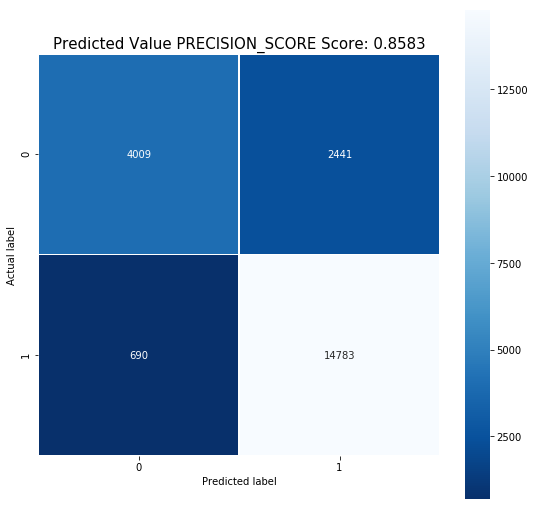



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


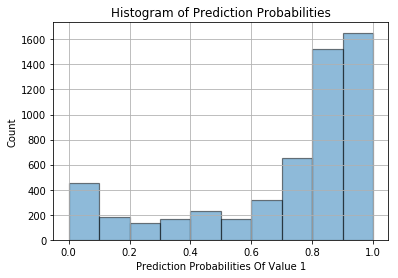

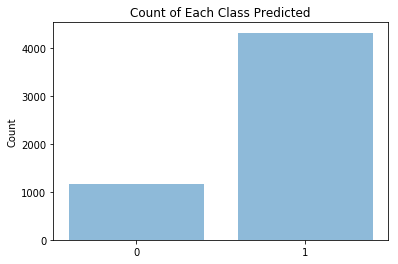

Number of 0 predictions: 1165
Number of 1 predictions: 4316
Percent of predictions with value 0: 0.21255245393176428
Percent of predictions with value 1: 0.7874475460682357


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


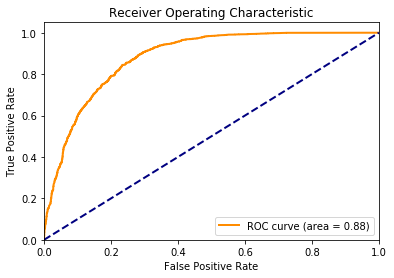



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8511220580186097
f1_score : 0.9002932551319649
precision_score : 0.8535681186283596
recall_score : 0.9524301964839711
roc_auc_score : 0.7803068527367159


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1613
           1       0.85      0.95      0.90      3868

    accuracy                           0.85      5481
   macro avg       0.85      0.78      0.80      5481
weighted avg       0.85      0.85      0.84      5481



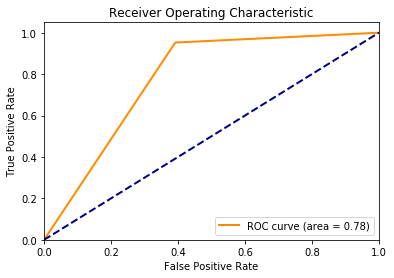

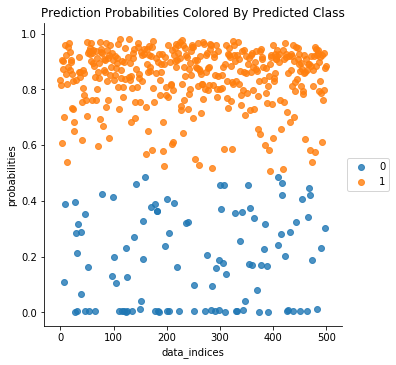

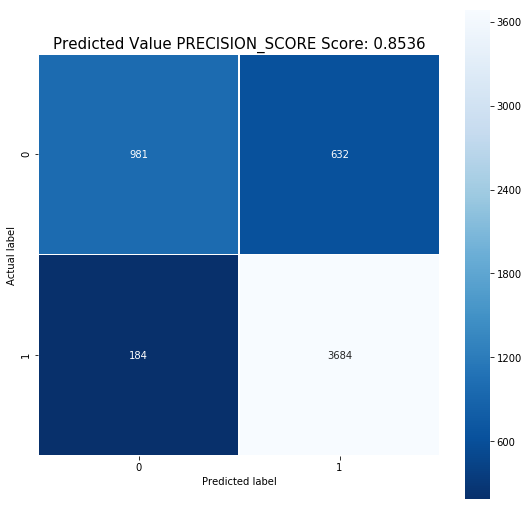

In [21]:
base_fit_model, base_pred_dict, base_score_dict = model_data(train_data, train_target, test_data, test_target, base_model,  
               cv_scorers, cv_num, metric_fcns, main_scorer)

Perform feature selection

-- Low Variance Filter Feature Selection --
Thresholds Selected: 0.1
Selected Model CV Mean  test_accuracy  Score: 0.847374780480903
Selected Model CV  test_accuracy  Deviation: 0.009192364581103715
Selected Model CV Mean  test_f1  Score: 0.8981232605321905
Selected Model CV  test_f1  Deviation: 0.0057362276191554925
Selected Model CV Mean  test_precision  Score: 0.849129974790684
Selected Model CV  test_precision  Deviation: 0.009661335244485758
Selected Model CV Mean  test_recall  Score: 0.9531439348449707
Selected Model CV  test_recall  Deviation: 0.00718031087488371
Selected Model CV Mean  test_roc_auc  Score: 0.8788890369965646
Selected Model CV  test_roc_auc  Deviation: 0.00787885766621395
Number of Original Features: 360
Number of Selected Features: 35
Selected Features:
['addr_age_yrs', 'yop_yrs', 'doctor_age_yrs', 'hist_ent_id_addr_count', 'hist_ent_all_addr_count', 'curr_ent_id_addr_count', 'curr_ent_all_addr_count', 'curr_usg_all_addr_count', 'pcp_0', 'pcp_1', 'ent_comm_src_

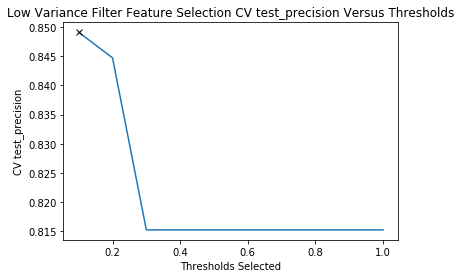



-- Model Wrapper Feature Selection --
Selected Model CV Mean  test_accuracy  Score: 0.8551748662077919
Selected Model CV  test_accuracy  Deviation: 0.011550407797791876
Selected Model CV Mean  test_f1  Score: 0.9029054568436979
Selected Model CV  test_f1  Deviation: 0.007210732519936209
Selected Model CV Mean  test_precision  Score: 0.8570558974336265
Selected Model CV  test_precision  Deviation: 0.012682393064327398
Selected Model CV Mean  test_recall  Score: 0.9539841247795253
Selected Model CV  test_recall  Deviation: 0.008786908372912874
Selected Model CV Mean  test_roc_auc  Score: 0.8852022846575665
Selected Model CV  test_roc_auc  Deviation: 0.006601066054956358
Number of Original Features: 360
Number of Selected Features: 42
Selected Features:
['addr_age_yrs', 'yop_yrs', 'doctor_age_yrs', 'hist_ent_id_addr_count', 'hist_ent_all_addr_count', 'curr_ent_id_addr_count', 'curr_ent_all_addr_count', 'curr_usg_all_addr_count', 'lic_state_match_0', 'pcp_0', 'ent_comm_src_cat_code_ACS',

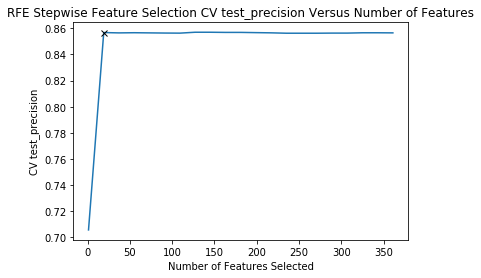



-- Univariate Chi-Sq Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.8551748349965459
Selected Model CV  test_accuracy  Deviation: 0.011129594072381318
Selected Model CV Mean  test_f1  Score: 0.9026624492333319
Selected Model CV  test_f1  Deviation: 0.006857522683292775
Selected Model CV Mean  test_precision  Score: 0.8587655559902245
Selected Model CV  test_precision  Deviation: 0.01278520002532339
Selected Model CV Mean  test_recall  Score: 0.9513342724936378
Selected Model CV  test_recall  Deviation: 0.00778048402505658
Selected Model CV Mean  test_roc_auc  Score: 0.881929642844737
Selected Model CV  test_roc_auc  Deviation: 0.009006815313709275
Number of Original Features: 360
Number of Selected Features: 18
Selected Features:
['addr_age_yrs', 'yop_yrs', 'doctor_age_yrs', 'hist_ent_all_addr_count', 'curr_ent_id_addr_count', 'curr_ent_all_addr_count', 'curr_usg_all_addr_count', 'lic_state_match_0', 'ent_comm_src_cat_code_ADMIT-H

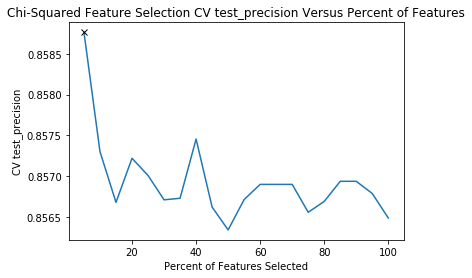



-- Mutual Information Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.845641401509792
Selected Model CV  test_accuracy  Deviation: 0.012908399496557562
Selected Model CV Mean  test_f1  Score: 0.8964278114815165
Selected Model CV  test_f1  Deviation: 0.008180958857745111
Selected Model CV Mean  test_precision  Score: 0.8515192348880646
Selected Model CV  test_precision  Deviation: 0.011909690520828301
Selected Model CV Mean  test_recall  Score: 0.9463581291843195
Selected Model CV  test_recall  Deviation: 0.006554669931432864
Selected Model CV Mean  test_roc_auc  Score: 0.8755936367570574
Selected Model CV  test_roc_auc  Deviation: 0.006715706571571021
Number of Original Features: 360
Number of Selected Features: 18
Selected Features:
['addr_age_yrs', 'hist_ent_all_addr_count', 'curr_ent_id_addr_count', 'curr_usg_all_addr_count', 'lic_state_match_0', 'lic_state_match_1', 'ent_comm_src_cat_code_ADMIT-HOS', 'ent_comm_src_cat_code_GROU

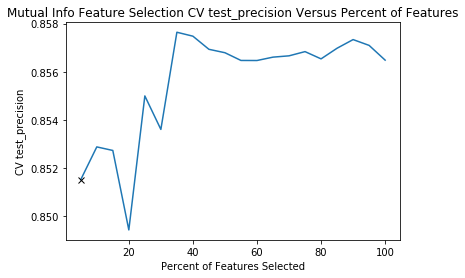



-- Anova F Statistic Feature Selection --
Percent of Features Selected: 5
Selected Model CV Mean  test_accuracy  Score: 0.8545818837443507
Selected Model CV  test_accuracy  Deviation: 0.009314979906175832
Selected Model CV Mean  test_f1  Score: 0.9021174503083518
Selected Model CV  test_f1  Deviation: 0.005428064150428349
Selected Model CV Mean  test_precision  Score: 0.8594253839669591
Selected Model CV  test_precision  Deviation: 0.013030379731413851
Selected Model CV Mean  test_recall  Score: 0.9493308326188684
Selected Model CV  test_recall  Deviation: 0.007787302651604598
Selected Model CV Mean  test_roc_auc  Score: 0.8789410629106665
Selected Model CV  test_roc_auc  Deviation: 0.008218143291647039
Number of Original Features: 360
Number of Selected Features: 18
Selected Features:
['addr_age_yrs', 'curr_ent_id_addr_count', 'curr_ent_all_addr_count', 'curr_usg_all_addr_count', 'lic_state_match_0', 'lic_state_match_1', 'ent_comm_src_cat_code_ADMIT-HOS', 'ent_comm_src_cat_code_ECF-

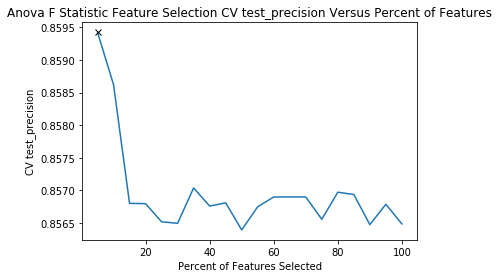



Scores Per Feature Selection Type:
  fs_type  opt_score  num_vars
0     lvf   0.849130        35
0    wrap   0.857056        42
0    step   0.856721        19
0   chisq   0.858766        18
0  mutinf   0.851519        18
0  anovaf   0.859425        18


Optimal Feature Selection Choice Based On  precision :
FS Type:  anovaf
FS Score:  0.8594253839669591




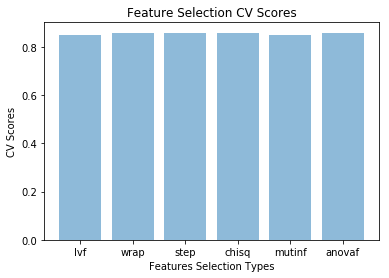

In [22]:
results_dict, opt_fs_dict, all_scores_df = perform_feat_sel_models(train_data, train_target, test_data, 
                            base_model, perc_vals, k_vals, thresh_vals, 
                            cv_num, cv_scorers, main_scorer, score_thresh, var_buffer_perc, step_val)

Extract feature selection training and testing datasets

In [23]:
fs_train_data = opt_fs_dict['train_data']
fs_test_data = opt_fs_dict['test_data']

Build base model with only features chosen from feature selection

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.8545818837443507 +/- 0.009314979906175832
CV  test_f1 : 0.9021174503083518 +/- 0.005428064150428349
CV  test_precision : 0.8594253839669591 +/- 0.013030379731413851
CV  test_recall : 0.9493308326188684 +/- 0.007787302651604598
CV  test_roc_auc : 0.8789410629106665 +/- 0.008218143291647039
CV Runtime: 7.767224550247192


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




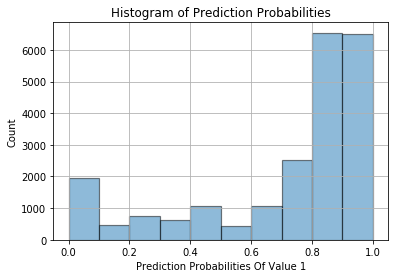

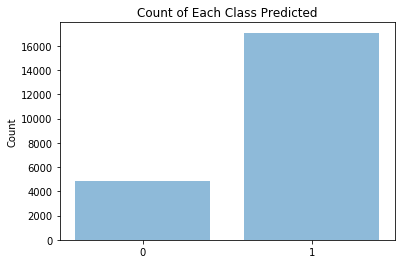

Number of 0 predictions: 4846
Number of 1 predictions: 17077
Percent of predictions with value 0: 0.22104638963645487
Percent of predictions with value 1: 0.7789536103635452


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


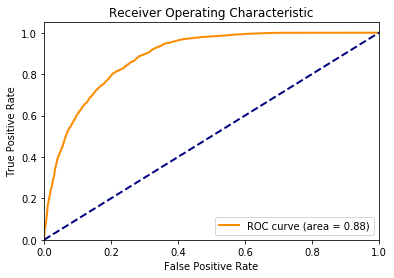



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8560416001459654
f1_score : 0.9030414746543779
precision_score : 0.8606312584177549
recall_score : 0.9498481225360305
roc_auc_score : 0.7904279372370074


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      6450
           1       0.86      0.95      0.90     15473

    accuracy                           0.86     21923
   macro avg       0.85      0.79      0.81     21923
weighted avg       0.85      0.86      0.85     21923



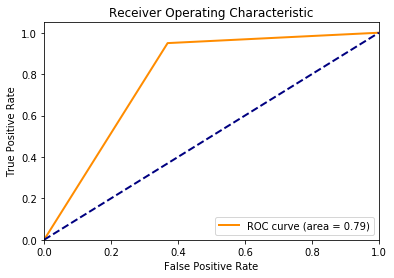

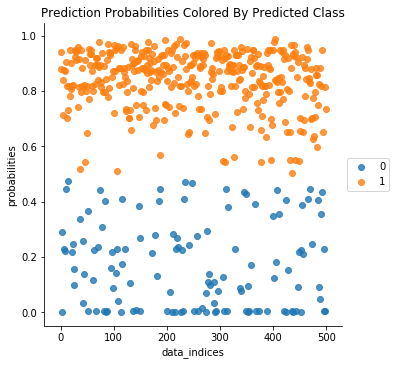

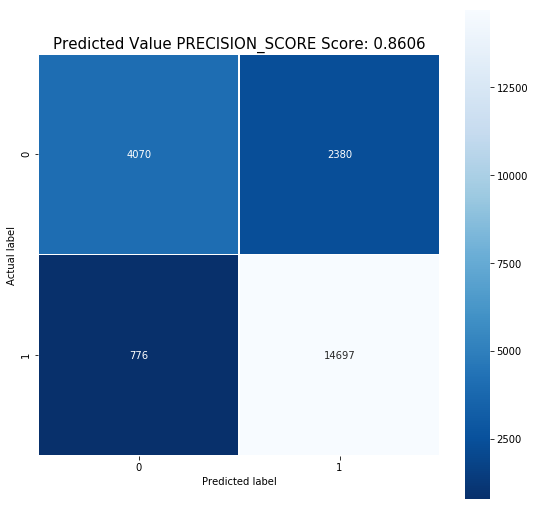



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


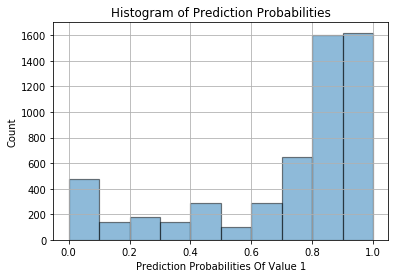

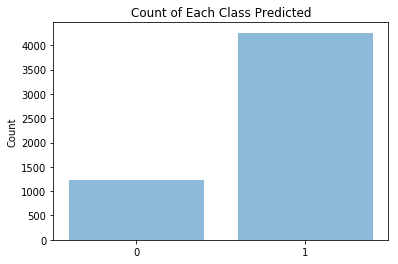

Number of 0 predictions: 1221
Number of 1 predictions: 4260
Percent of predictions with value 0: 0.2227695675971538
Percent of predictions with value 1: 0.7772304324028462


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


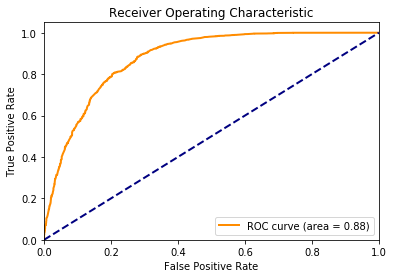



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.852581645685094
f1_score : 0.9005905511811023
precision_score : 0.8591549295774648
recall_score : 0.9462254395036195
roc_auc_score : 0.78712387908225


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.63      0.71      1613
           1       0.86      0.95      0.90      3868

    accuracy                           0.85      5481
   macro avg       0.84      0.79      0.81      5481
weighted avg       0.85      0.85      0.85      5481



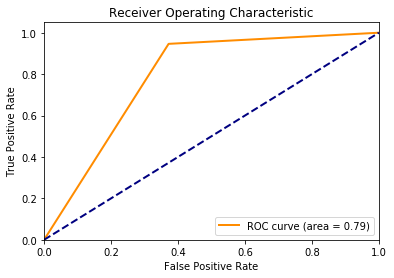

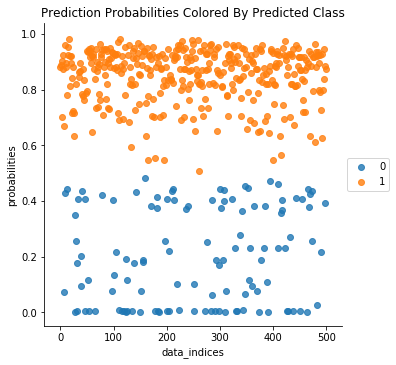

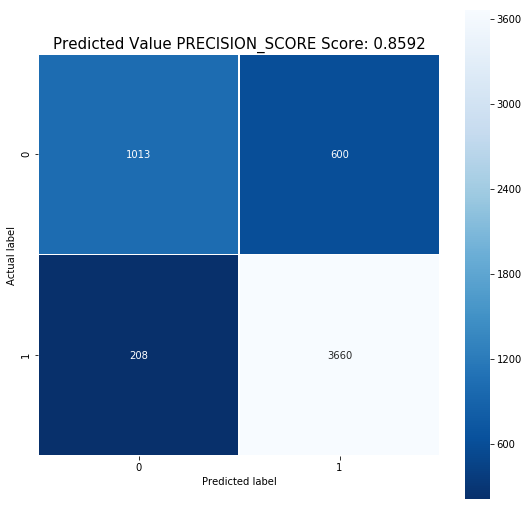

In [24]:
fs_fit_model, fs_pred_dict, fs_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, base_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

Save off model from feature selection

In [25]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Base_FS.sav'
pickle.dump(fs_fit_model, open(pred_filename, 'wb'))

Perform grid search on chosen feature selection dataset

*** Grid Search ***
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 75.3min finished


Grid Search Runtime: 4521.1078424453735


Grid Search Optimal Parameters: {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 250, 'objective': 'binary:logistic'}
Grid Search Optimal Parameter Score: 0.8623965335971457


Optimal Model Parameter Settings:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=45,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)




All Model Results
-----------------


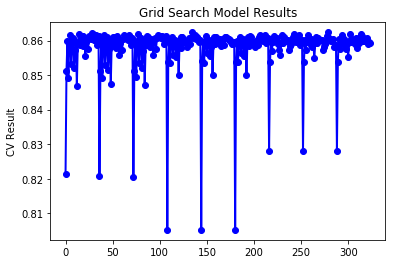

In [26]:
opt_model, gs = perform_grid_search(grid_model, fs_train_data, train_target, grid_params, main_scorer, cv_num)

Evaluate performance of optimal model chosen

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.856816952284247 +/- 0.006638847451376372
CV  test_f1 : 0.9034020948123492 +/- 0.0036117486529245353
CV  test_precision : 0.8623965928835606 +/- 0.011371756140250757
CV  test_recall : 0.9485552003826261 +/- 0.007779472245692194
CV  test_roc_auc : 0.8839453996157693 +/- 0.006922555013948389
CV Runtime: 18.533428192138672


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




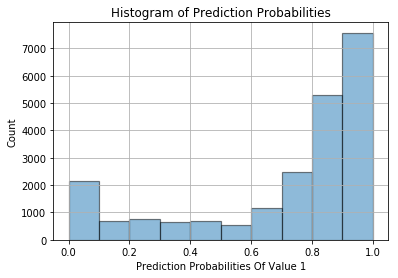

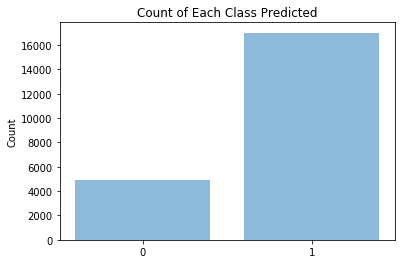

Number of 0 predictions: 4913
Number of 1 predictions: 17010
Percent of predictions with value 0: 0.22410254071066915
Percent of predictions with value 1: 0.7758974592893308


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


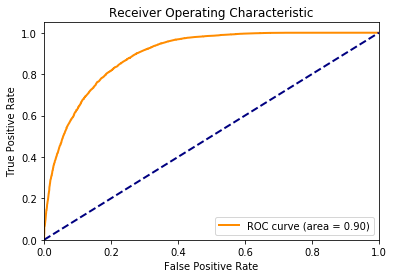



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8604661770743055
f1_score : 0.9058276637010128
precision_score : 0.8649029982363315
recall_score : 0.9508175531571124
roc_auc_score : 0.7972692416948353


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      6450
           1       0.86      0.95      0.91     15473

    accuracy                           0.86     21923
   macro avg       0.86      0.80      0.82     21923
weighted avg       0.86      0.86      0.85     21923



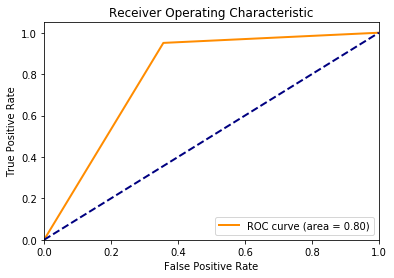

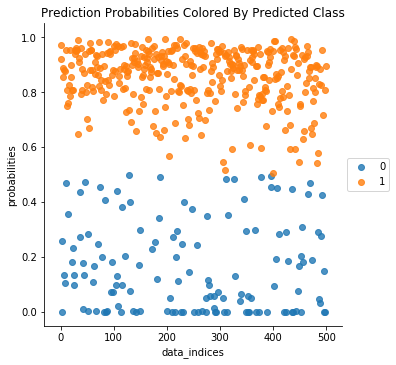

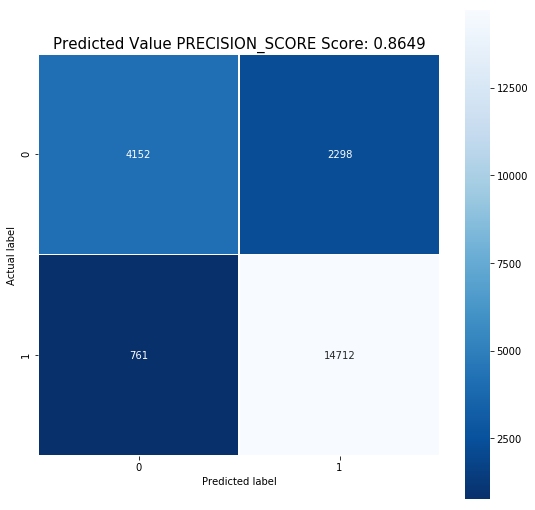



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


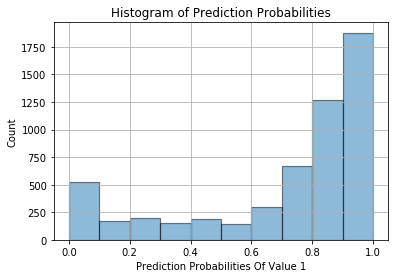

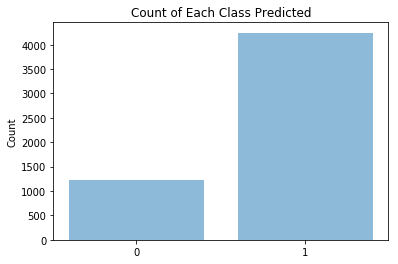

Number of 0 predictions: 1236
Number of 1 predictions: 4245
Percent of predictions with value 0: 0.22550629447181172
Percent of predictions with value 1: 0.7744937055281883


------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


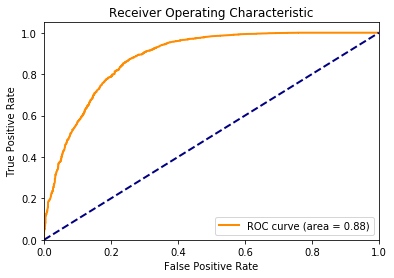



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.8549534756431308
f1_score : 0.9020091211635647
precision_score : 0.8619552414605418
recall_score : 0.9459669079627715
roc_auc_score : 0.791334352927449


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1613
           1       0.86      0.95      0.90      3868

    accuracy                           0.85      5481
   macro avg       0.85      0.79      0.81      5481
weighted avg       0.85      0.85      0.85      5481



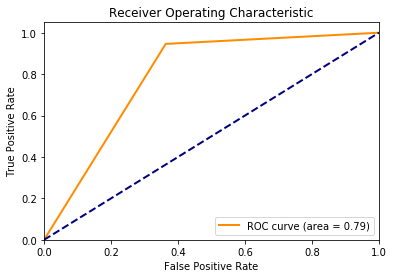

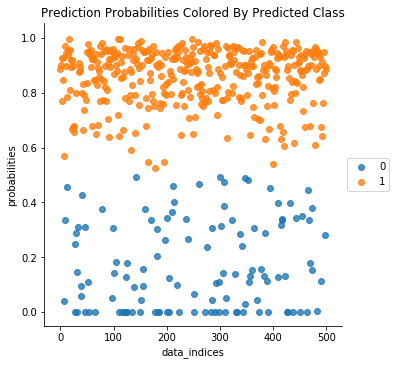

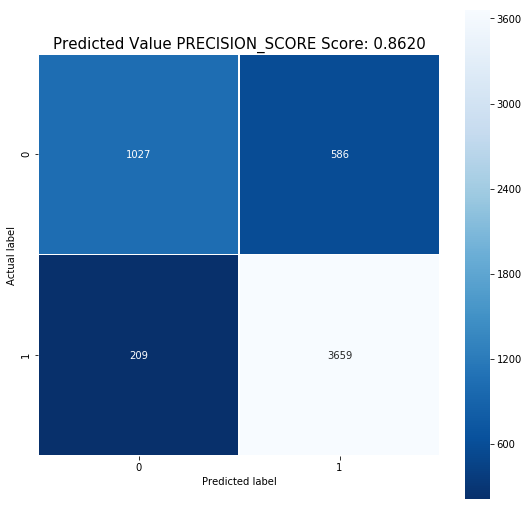

In [27]:
opt_fit_model, opt_pred_dict, opt_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, opt_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

View model feature importance values

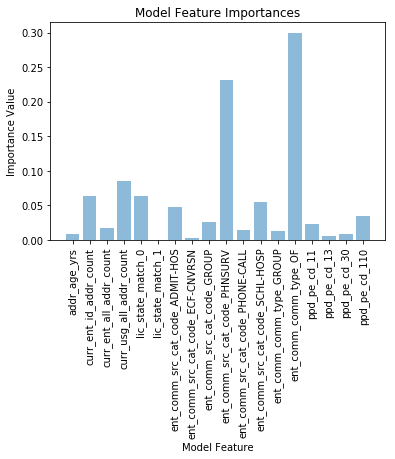

                                  Importance
addr_age_yrs                        0.008724
curr_ent_id_addr_count              0.064234
curr_ent_all_addr_count             0.016767
curr_usg_all_addr_count             0.084965
lic_state_match_0                   0.063181
lic_state_match_1                   0.000000
ent_comm_src_cat_code_ADMIT-HOS     0.048113
ent_comm_src_cat_code_ECF-CNVRSN    0.003330
ent_comm_src_cat_code_GROUP         0.026527
ent_comm_src_cat_code_PHNSURV       0.231734
ent_comm_src_cat_code_PHONE-CALL    0.014184
ent_comm_src_cat_code_SCHL-HOSP     0.055148
ent_comm_comm_type_GROUP            0.012470
ent_comm_comm_type_OF               0.299720
ppd_pe_cd_11                        0.022813
ppd_pe_cd_13                        0.005689
ppd_pe_cd_30                        0.007858
ppd_pe_cd_110                       0.034543


In [28]:
fit_cols = fs_train_data.columns.values

importance = opt_fit_model.feature_importances_
importance_df = pd.DataFrame(importance, index = fs_train_data.columns, 
                          columns = ['Importance'])
plt.bar(list(fit_cols), importance.tolist(), align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Importance Value') 
plt.xlabel('Model Feature')
plt.title('Model Feature Importances')
plt.show()

print(importance_df)

Save model for future use

In [29]:
model_filename = model_path + start_time_str + '_' + model_base_name + '.sav'
pickle.dump(opt_fit_model, open(model_filename, 'wb'))

Save list of features used

In [30]:
var_filename = model_path + start_time_str + '_' + model_base_name + '_FeatureList.sav'
pickle.dump(fit_cols, open(var_filename, 'wb'))

Save Results

In [31]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Preds.sav'
pickle.dump(opt_pred_dict, open(pred_filename, 'wb'))

In [32]:
scores_filename = model_res_path + start_time_str + '_' + model_base_name + '_Scores.sav'
pickle.dump(opt_score_dict, open(scores_filename, 'wb'))

In [33]:
end_time = datetime.datetime.now()
elapsed_time = end_time - current_time
print('Elapsed time (sec): {}'.format(elapsed_time))
print('Elapsed time (min): {}'.format((elapsed_time / 60)))
print('Elapsed time (hrs): {}'.format(((elapsed_time / 60) / 60)))

Elapsed time (sec): 3:33:03.367269
Elapsed time (min): 0:03:33.056121
Elapsed time (hrs): 0:00:03.550935
